<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/KNN_and_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Linear Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style

%load_ext autoreload
%autoreload 2

Let's define a synthetic dataset and experiment on it. We will need to define a `pandas` dataframe with 3 columns using the 3 arrays given below.

In [ ]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])
 
my_dict = {'x1':x1, 'x2':x2, 'y':y}
data = pd.DataFrame(my_dict)

Plot the data in axes $x_1$ and $x_2$, highlight two classes with different colors, name the axes.

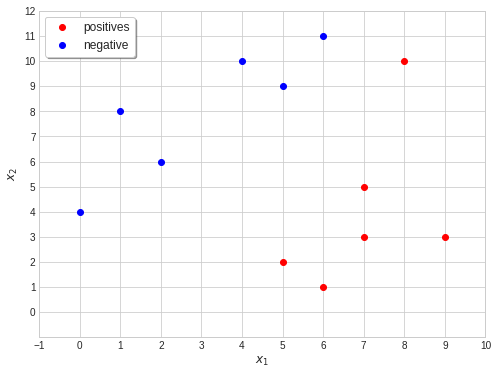

In [ ]:
def plot_data(data): 
  plt.figure(figsize=(8, 6))
  ##### YOUR CODE HERE #####
  plt.plot(data.loc[data.y==1, 'x1'], data.loc[data.y==1, 'x2'],
          'ro' , label='positives') 
  plt.plot(data.loc[data.y==-1, 'x1'], data.loc[data.y==-1, 'x2'],
          'bo' , label='negative') 

  min_x1 = np.min(data['x1'])
  max_x1 = np.max(data['x1'])
  min_x2 = np.min(data['x2'])
  max_x2 = np.max(data['x2'])

  plt.legend(markerscale=1, loc='upper left', 
            frameon=True, shadow=True, fontsize=12)

  plt.xticks(list(range(min_x1-1, max_x2+2)))
  plt.yticks(list(range(min_x2-1, max_x2+2)))
  plt.xlim(min_x1-1, max_x1+1)
  plt.ylim(min_x1-1, max_x2+1)

  # Specify axes parameters

  # Axis labels
  plt.xlabel('$x_1$', size=12) 
  plt.ylabel('$x_2$', size=12)
  ##### YOUR CODE HERE ##### 

plot_data(data)

Find and highlight in the plot the center of mass for each of the two classes as well as the middle point between these centers.

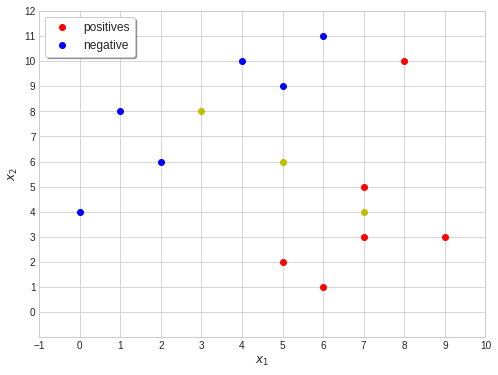

In [ ]:
plot_data(data)
##### YOUR CODE HERE ##### 
p = data.loc[data.y == 1, ['x1', 'x2']].mean()
n = data.loc[data.y == -1, ['x1', 'x2']].mean()
mid = (p + n) / 2

plt.plot(p[0], p[1], 'yo')
plt.plot(n[0], n[1], 'yo')
plt.plot(mid[0], mid[1], 'yo')
##### YOUR CODE HERE ##### 
plt.show()

Find the equation of the decision boundary line chosen by the basic linear classifier and add it to the plot. 

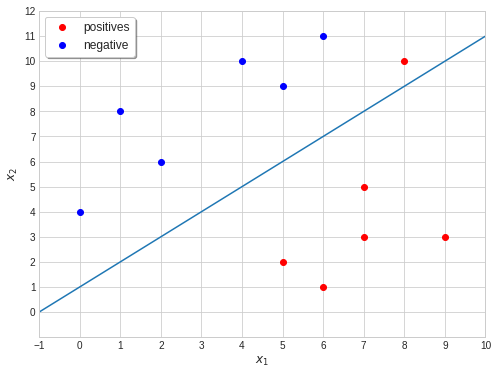

In [ ]:
plot_data(data)
##### YOUR CODE HERE ##### 
w = p - n
t = w @ mid 
x = np.arange(-5,15)
plt.plot(x, -w[0] / w[1] * x + t / w[1]) 
##### YOUR CODE HERE ##### 
plt.show()

* Did you notice any misclassified instances? 

* Are the classes linearly separable in the training data? 

* Can you write an algorithm to find the optimal decision line for this data? (Hint: use your knowledge for gradient descent).

#Perceptron

The idea of perceptron is the following:

* we classify the instances with this formula
$$f(\boldsymbol{x})=sign(\boldsymbol{w} \cdot \boldsymbol{x}),$$
where $sign(t)=
\begin{cases}
1, \text{if } t \geq 0 \\
-1, \text{if } t<0
\end{cases}$

* if a $\boldsymbol{x}_i$ record is classified correctly, then
$$y_i\cdot(\boldsymbol{w}\cdot\boldsymbol{x}_i)>0,$$ otherwise
$$y_i\cdot(\boldsymbol{w}\cdot\boldsymbol{x}_i)<0$$

* we need to minimize the misclassifications, therefore the loss function for perceptron algorithm will be
$$L(w)=-\sum_{x_i \in E}y_i \cdot \boldsymbol{w} \cdot \boldsymbol{x}_i,$$
where $E$ is the set of misclassified instances.

* the gradient of $L$ will be
$$\nabla_{\boldsymbol{w}} L(\boldsymbol{w})=-\sum_{x_i \in E}y_i \boldsymbol{x}_i$$

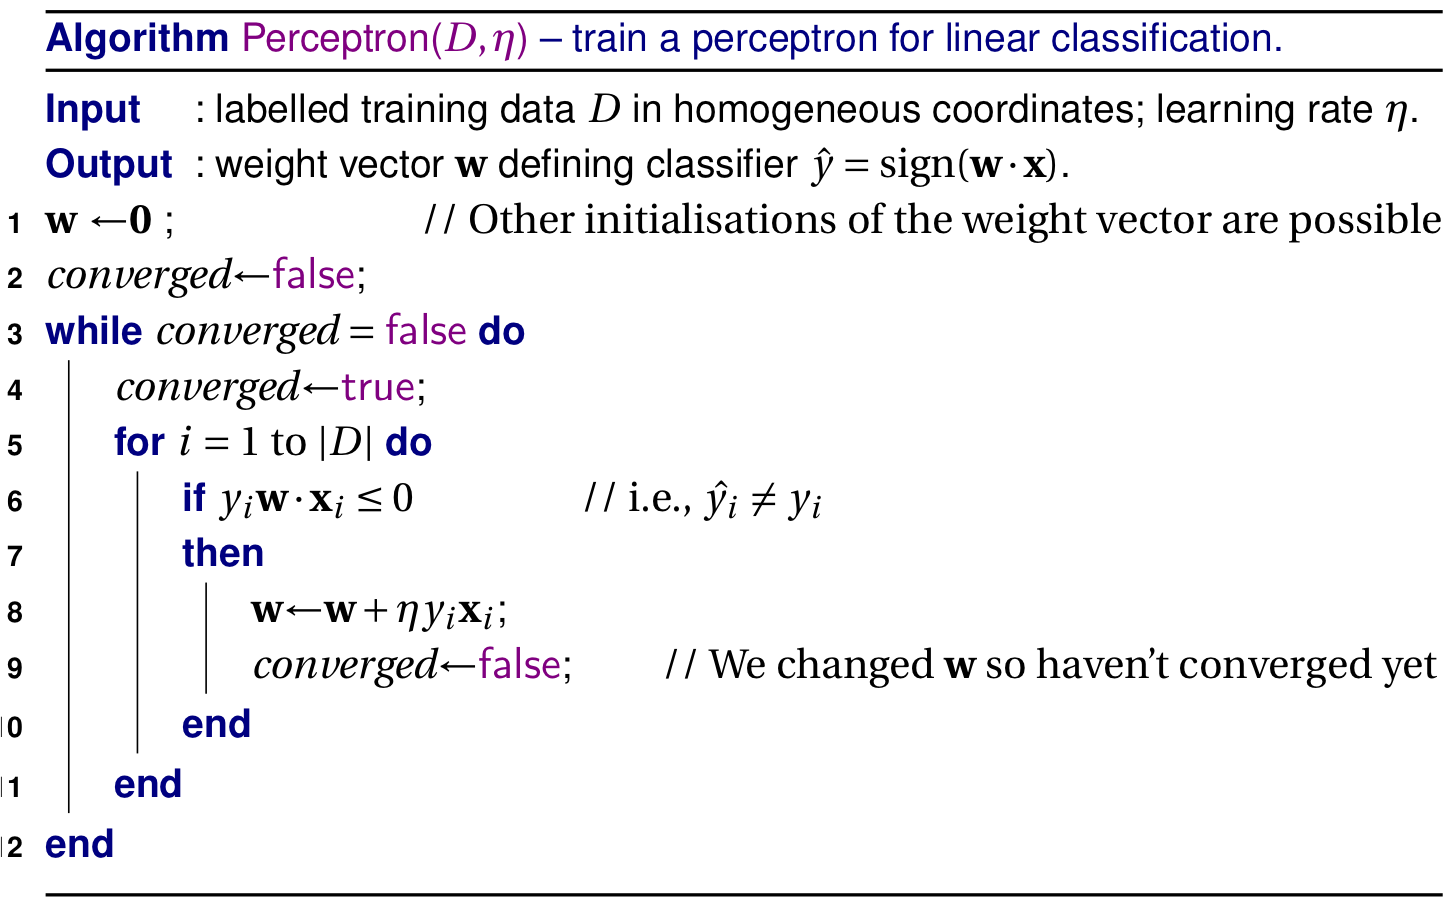

In [ ]:
from IPython.display import Image
Image("perceptron_algorithm.png", width=600)

In [ ]:
def perceptron(data, w=[0,0,0], learning_rate=1):
  y = data.iloc[:,-1]
  x = data.iloc[:,:-1]
  converged = False
  while converged == False:
      converged = True
      for i in range(data.shape[0]):
          if y[i]  * np.dot(w, x.iloc[i]) <= 0:
              w += learning_rate * y[i]  * x.iloc[i]
              converged = False
  return w

In [ ]:
data['x0'] = np.ones(len(data)) # for the bias term
data = data[['x0', 'x1', 'x2', 'y']]  # Make column reordering
w = perceptron(data)

In [ ]:
def perceptron2(data, w=[0,0,0], learning_rate=1):
  y = data.iloc[:,-1]
  x = data.iloc[:,:-1]
  converged = False
  while converged == False:
      converged = True
      for i in range(data.shape[0]):
          if y[i]  * np.dot(w, x.iloc[i]) <= 0:
              w += learning_rate * y[i]  * x.iloc[i]

              plot_data(data)
              xx = np.arange(-5,15)
              slope = -w[1]/w[2]
              intercept = -w[0]/w[2]
              plt.plot(xx, slope * xx + intercept)
              plt.show()
              converged = False
  return w

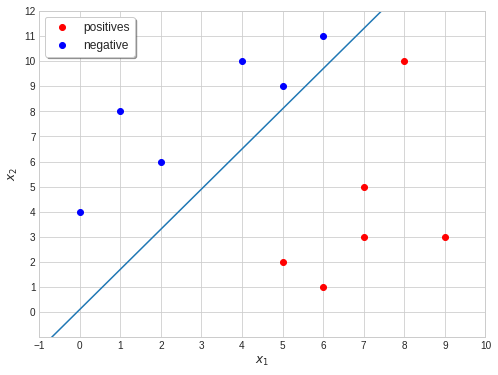

In [ ]:
plot_data(data)
x = np.arange(-5,15)
slope = -w[1]/w[2]
intercept = -w[0]/w[2]
plt.plot(x, slope * x + intercept)
plt.show()

# K-nearest neighbours

In this exercise you will program your own KNN algorithm and compare it to sklearn's implementation. We will use `car.csv` dataset for this. The dataset is from [kaggle](https://www.kaggle.com/elikplim/car-evaluation-data-set).

In [ ]:
data = pd.read_csv("car.csv", dtype="category", header = None)
data.columns = ["buying", "maint", "doors", "persons", 
                "lug-boot", "safety", "accept"]

In [ ]:
print(data.shape)
data.head()

(1728, 7)


,buying,maint,doors,persons,lug-boot,safety,accept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Use the `train_test_split` method (use the documentation) to divide the data into 75% training and 25% testing data. Use parameter random_state = 0 to set the same random seed and ensure that we all get the same results.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],
                                                    data['accept'],
                                                    test_size=0.25,
                                                    random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1296, 6) (432, 6) (1296,) (432,)


In [ ]:
data.accept.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: accept, dtype: int64

In [ ]:
def accuracy(actual, predicted):
  return sum(actual == predicted) / len(predicted)

Upload the `Courses/MachineLearning/Labs/Lab_files/Lab1/knn.py` script to Colab drive and complete the code in order to train a KNN model on the training data and test its performance on the testing data. If you do everything correctly you will get around $75 \%$ accuracy on the test set by running the code below.

In [ ]:
from knn import KNearestNeighbor
model = KNearestNeighbor(X_train, y_train)
predictions = model.fit_predict(X_test, k=1)
accuracy(y_test, predictions)

0.7546296296296297

Now try different values for k, for example $(1,3,...,15)$ and plot the resulting accuracies (on y-axis) with respect to the values of $k$ (on x-axis).

In [ ]:
accuracies = []
k_values = range(1, 20, 2)
for k in k_values:
  model = KNearestNeighbor(X_train, y_train)
  predictions = model.fit_predict(X_test, k=k)
  accuracies.append(accuracy(y_test, predictions))

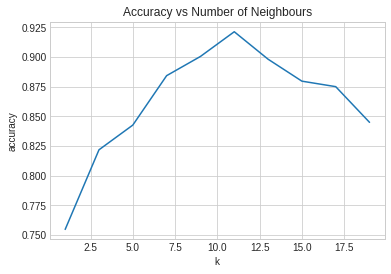

In [ ]:
plt.plot(k_values, accuracies)
plt.title('Accuracy vs Number of Neighbours')
plt.ylabel('accuracy')
plt.xlabel('k');

## Comparing with `sklearn`'s implementation

For `sklearn`'s implementation the data should be converted to numeric.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data1 = enc.fit_transform(data)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1[:, :-1],
                                                        data1[:, -1],
                                                        test_size=0.25,
                                                        random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=1, metric='hamming')
model2.fit(X_train1, y_train1)
predictions1 = model2.predict(X_test1)
accuracy(y_test1, predictions1)

0.7800925925925926

Sklearn's implementation is different from ours, because it uses optimized algorithms and tree data-structures. You can read more about those approaches [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms). We can still reproduce our result by setting the `algorithm` parameter to `brute`, which stands for the *brute-force* method.

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=1, metric='hamming',
                              algorithm='brute')
model2.fit(X_train1, y_train1)
predictions1 = model2.predict(X_test1)
accuracy(y_test1, predictions1)

0.7546296296296297

Now let's look at this simple example.

In [ ]:
data = pd.DataFrame({
    'mass':   [4, 5, 5, 5, 6, 7, 11, 11, 13, 13],  
    'height': [2, 1, 2, 3, 2, 4, 8,  10, 8,  10], 
    'label':  ['cat']*5 + ['dog']*5
}, 
    columns = ['mass', 'height', 'label'] # mantains column order
)
data

,mass,height,label
0,4,2,cat
1,5,1,cat
2,5,2,cat
3,5,3,cat
4,6,2,cat
5,7,4,dog
6,11,8,dog
7,11,10,dog
8,13,8,dog
9,13,10,dog


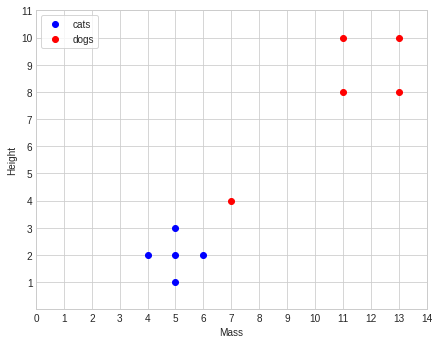

In [ ]:
def plot_cats_vs_dogs(data):
    # Specify figure parameters
    fig, ax = plt.subplots(figsize=(7, 5.5)) 
    # Data to plot
    ax.plot(data.loc[data.label == 'cat', 'mass'],
            data.loc[data.label == 'cat', 'height'], 'bo', label='cats') 
    ax.plot(data.loc[data.label == 'dog', 'mass'],
            data.loc[data.label == 'dog', 'height'], 'ro', label='dogs')

    # Specify axes parameters
    ax.set_xticks(list(range(0, 15)))
    ax.set_yticks(list(range(1, 12)))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 11)

    # Axis labels
    ax.set_xlabel('Mass')
    ax.set_ylabel('Height')
    
    return ax

# Show the plot inline
plot_cats_vs_dogs(data)
plt.legend(markerscale=1, frameon=True)
plt.show()

K-nearest neighbours algorithm makes decision for each point based on nearest neighbours' classes. We can visualize decision boundaries to compare classification with different K values.

We have this unknown point (marked with cross). In which class does it belong using 1-NN, or 3-NN...?

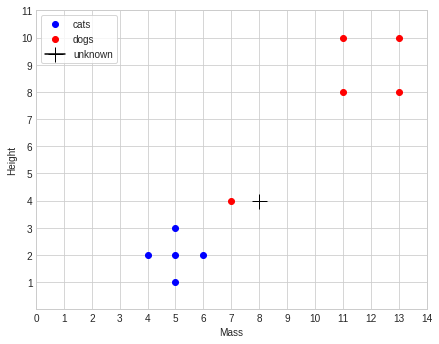

In [ ]:
plot_cats_vs_dogs(data)
plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
plt.legend(markerscale=1, frameon=True)
plt.show()

In [ ]:
def create_grid(X_train):
    x = np.arange(0, 15, 0.1)
    y = np.arange(0, 12, 0.1)
    xx, yy = np.meshgrid(x, y)
    # Generates all possible combinations
    X_grid = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()}) 
    return X_grid

def plot_model(ax,X_train,y_train,X_grid,model):
    y_pred = model.predict(X_grid)
    X_grid[y_pred=='dog'].plot(x='x',y='y',kind='scatter',
                               s=20,color='red',ax=ax, alpha=0.1, zorder=-1)
    X_grid[y_pred=='cat'].plot(x='x',y='y',kind='scatter',
                               s=20,color='blue',ax=ax, alpha=0.1, zorder=-1)
    X_train[y_train=='dog'].plot(x='x',y='y',kind='scatter',
                                 s=40,color='pink',ax=ax, alpha=0.1, zorder=-1)
    X_train[y_train=='cat'].plot(x='x',y='y',kind='scatter',s=40,
                                 color='lightblue',ax=ax, alpha=0.1, zorder=-1);

In [ ]:
def plot_decision_boundaries(model, data):
    X_train = data.iloc[:, :2]
    X_train.columns = ['x', 'y']
    y_train = data.label
    ax = plot_cats_vs_dogs(data)
    X_grid = create_grid(X_train)
    model = model.fit(X_train, y_train)
    plot_model(ax, X_train, y_train, X_grid, model)

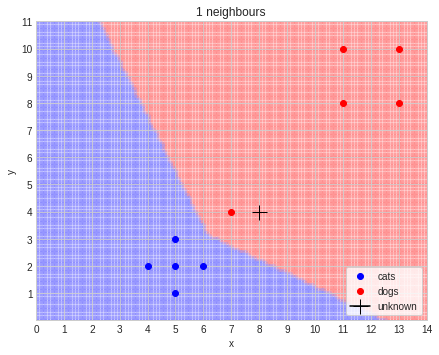

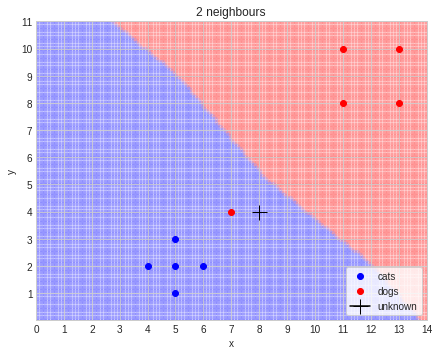

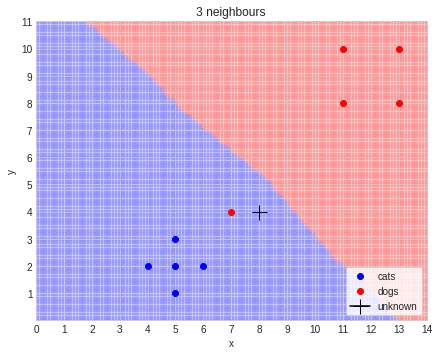

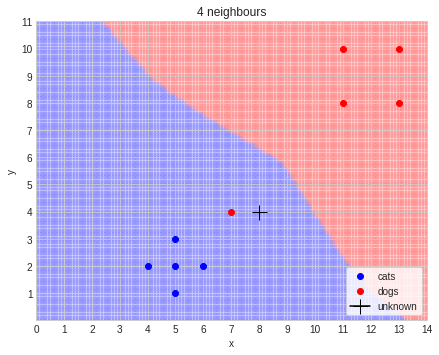

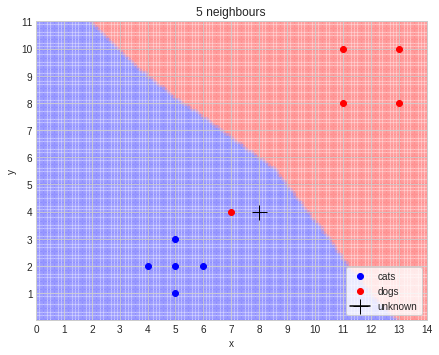

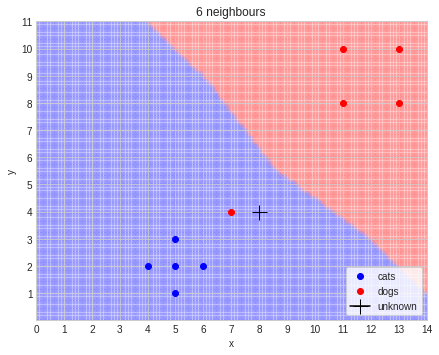

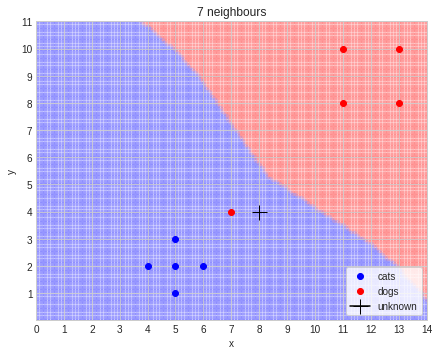

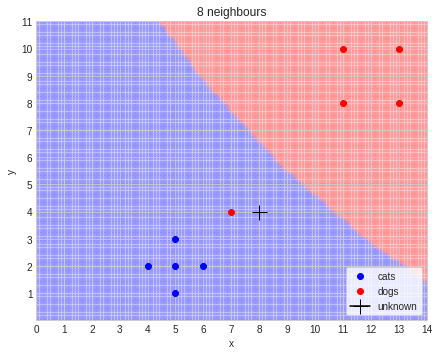

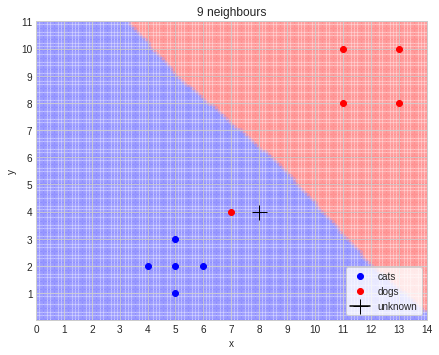

In [ ]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

In the KNeighborsClassifier, the default metric is minkowski, and with p=2 it is equivalent to the standard Euclidean distance. However, we can also use some other distance measures.

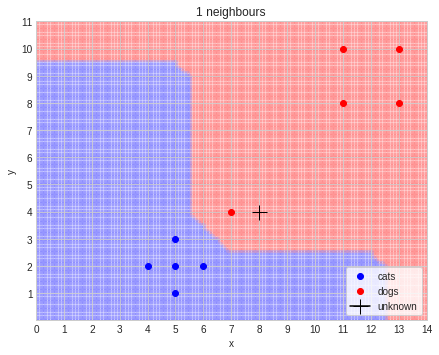

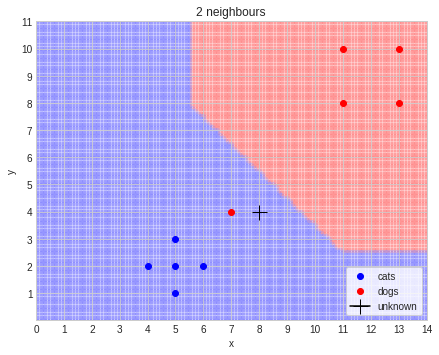

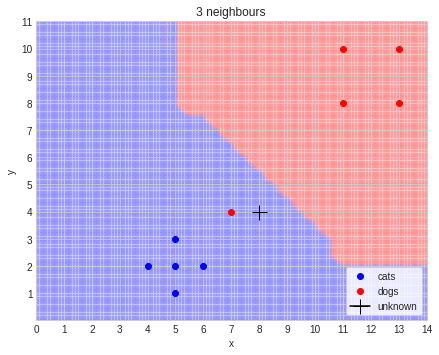

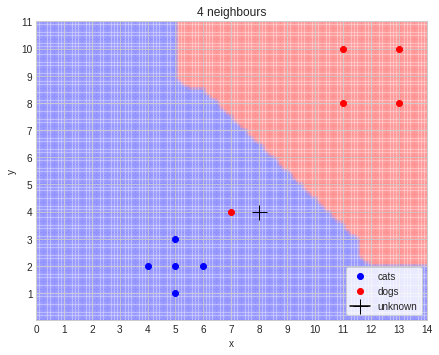

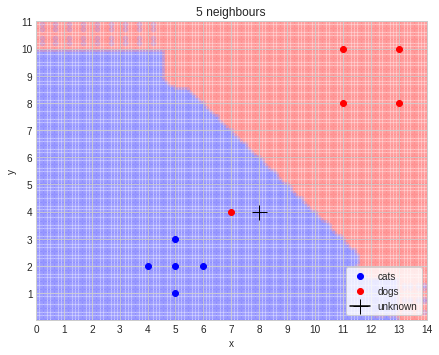

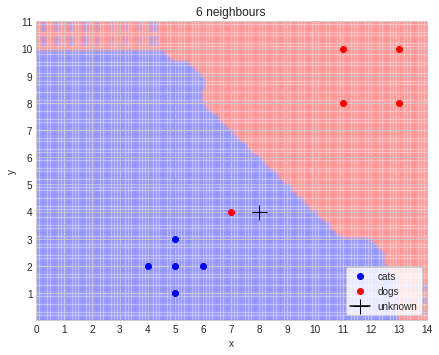

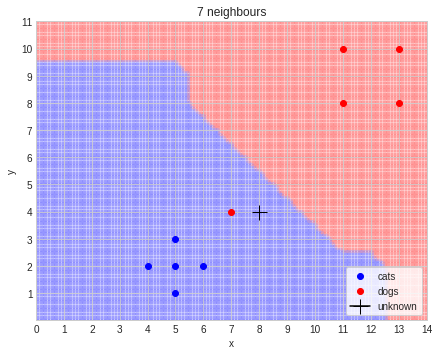

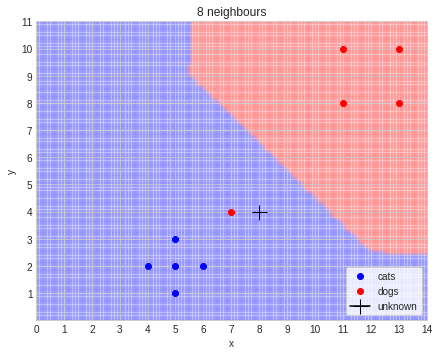

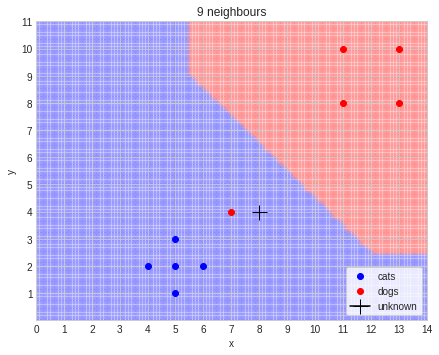

In [ ]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

We can use weights to weight each neighbour's vote inversely to its distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

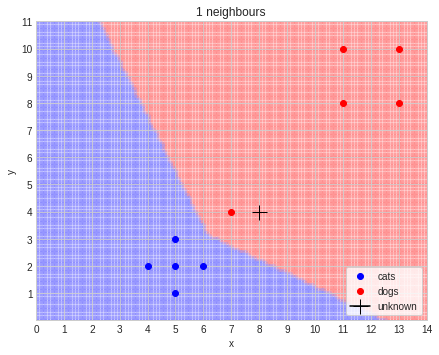

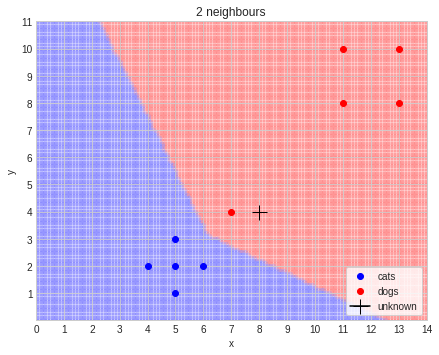

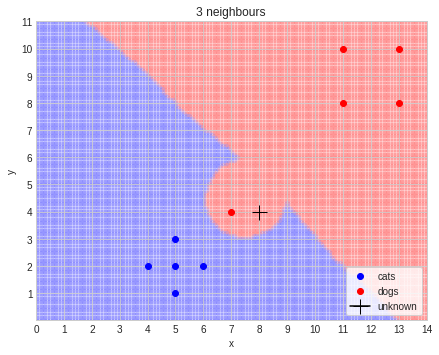

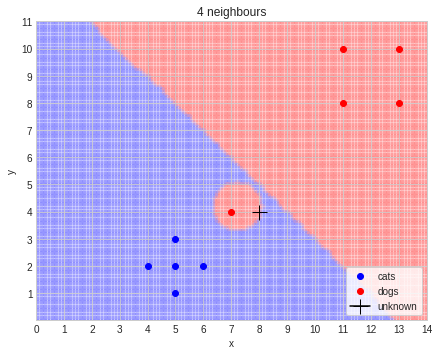

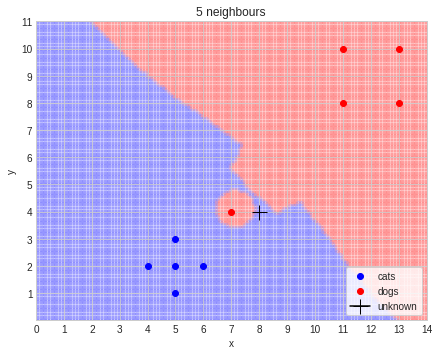

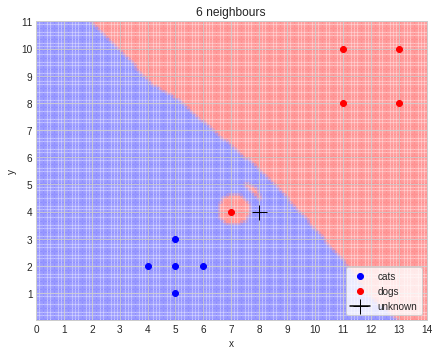

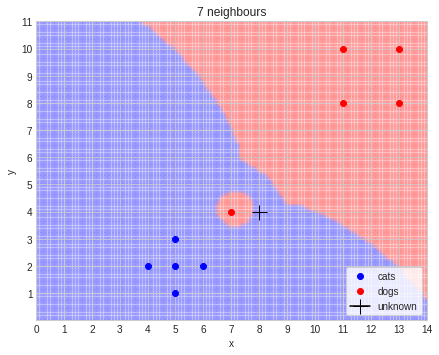

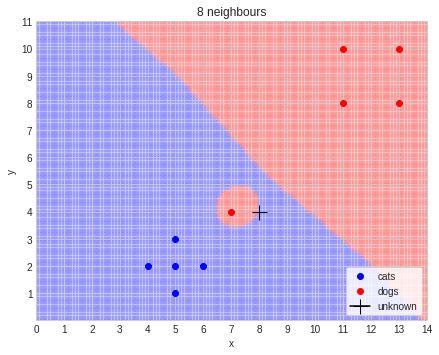

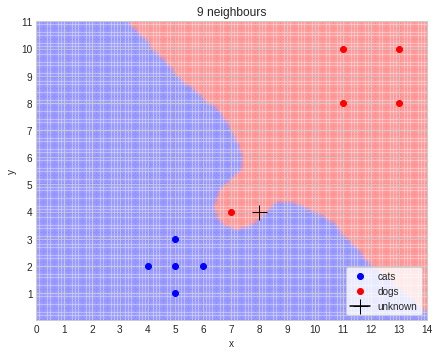

In [ ]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()
    

Now, let's use distance weighting and Manhattan distance instead of Euclidean distance.

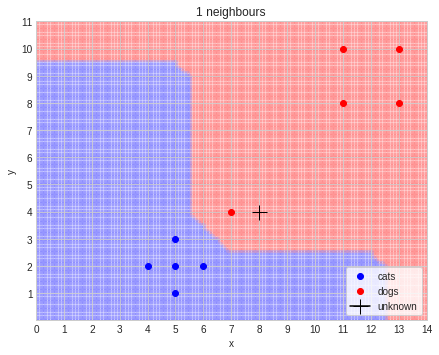

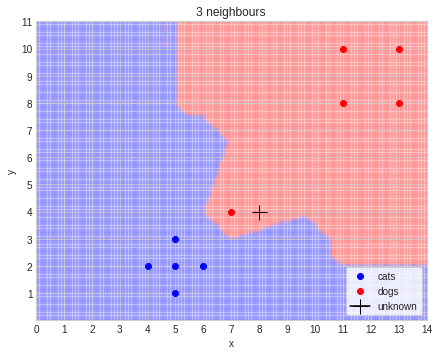

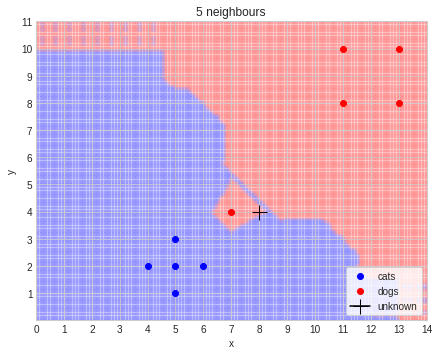

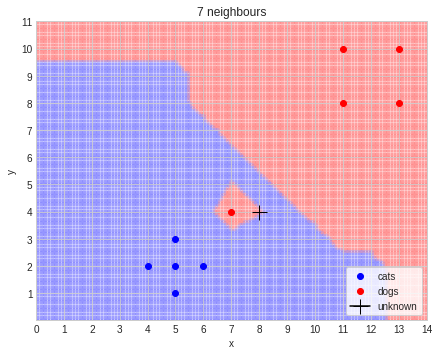

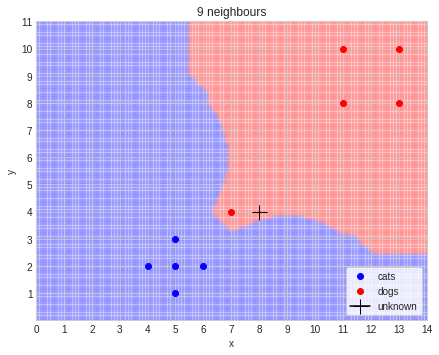

In [ ]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

# Naive-Bayes 

Now implement your own Naive Bayes method. You can fill in the methods in the prepared class `MyNaiveBayes` in `Courses/MachineLearning/Labs/Lab_files/Lab1/naive_bayes.py` script. Don't worry about the implementation speed at the moment, although, it would be good if you use your experience with Python to come up with an implementation that would also be efficient. Feel free to add methods or change the existing ones, but make sure that the functions `fit` and `predict` will still be in the class. 

If you implement everything correctly, you will get about $82.17\%$ accuracy on the test set without smoothing and $81.25\%$ with Laplace smoothing (don't forget to take into account the number of labels for this dataset).

In [ ]:
from naive_bayes import MyNaiveBayes
model = MyNaiveBayes(smoothing=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy(predictions, y_test)

0.8125

In [ ]:
# without smoothing
model = MyNaiveBayes(smoothing=False)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy(predictions, y_test)

0.8217592592592593

## Comparing with `sklearn` implementation

For `sklearn`'s Naive Bayes implementation the data should be converted to numeric as in the case of KNN.

Sklearn has different types of Naive Bayes classifiers such as `GaussianNB`, `MultinomialNB`, `BernouliNB` etc., for different types of data. To learn more about these different types visit [here](https://scikit-learn.org/stable/modules/naive_bayes.html). 

In our case we have categorical data and our assumption was that each feature has `categorical distribution` (generalization of bernouli distribution for more than 2 possible outcomes).

In [ ]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB(alpha=1)
model.fit(X_train1, y_train1)

CategoricalNB(alpha=1, class_prior=None, fit_prior=True)

In [ ]:
predictions = model.predict(X_test1)
accuracy(predictions, y_test1)

0.8125

In [ ]:
model = CategoricalNB(alpha=1e-10)
model.fit(X_train1, y_train1)
predictions = model.predict(X_test1)
accuracy(predictions, y_test1)

0.8217592592592593

# News Classification with Naive Bayes

Naive Bayes classifier is well-known for it's good performance on `text classification` task. Here we will go through the main concepts of text classification, before building our own model.

## The Bag of Words Model

One of the most important sub-tasks in pattern classification are `feature extraction` and `selection`. Prior to fitting the model and using machine learning algorithms for training, we need to think about how to best represent a text document as a `feature vector`. 

A commonly used model in Natural Language Processing is the so-called `bag of words` model. The idea behind this model is very intuitive. First comes the creation of the `vocabulary` — the collection of all different words that occur in the training set and each word is associated with a count of how often it occurs.

The vocabulary can then be used to construct the d-dimensional feature vectors for the individual documents where the dimensionality is equal to the number of different words in the vocabulary. This process is called `vectorization`.

When doing the above feature extraction, we may come across the question whether we should consider `word occurrencies` (encoding with 0s and 1s) or `word frequencies` (absolute counts of the words) in the text. The answer depends on the data and it is necessary to try both approaches. In general, the first method is usually better when applied on small texts.

## Tokenization

`Tokenization` describes the general process of breaking down a text corpus into individual elements that serve as input for various NLP algorithms (we have performed this task earlier in the programming module). Usually, tokenization is accompanied by other optional processing steps, such as the removal of `stop words` and `punctuation characters`, `stemming` or `lemmatizing`, and the construction of `n-grams`. Below is an example of a simple but typical tokenization step that splits a sentence into individual words, removes punctuation, and converts all letters to lowercase.

![tokenization](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/tokenization-1.png)

### Stop words

Stop words are words that are particularly common in a text corpus and thus considered as rather un-informative (e.g., words such as `so`, `and`, `or`, `the`, ...). One approach to stop word removal is to search against a language-specific stop word dictionary. An alternative approach is to create a stop list by sorting all words in the entire text corpus by frequency. The stop list — after conversion into a set of non-redundant words — is then used to remove all those words from the input documents that are ranked among the top n words in this stop list.

![stop words](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/stop-1.png)

##Stemming and Lemmatization

`Stemming` describes the process of transforming a word into its root form. The original stemming algorithm was developed my Martin F. Porter in 1979 and is hence known as Porter stemmer.

![stemming](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/porter-1.png)

Stemming can create non-real words, such as "thu" in the example above. 

In contrast to stemming, `lemmatization` aims to obtain the canonical (grammatically correct) forms of the words, the so-called lemmas. Lemmatization is computationally more difficult and expensive than stemming, and in practice, both stemming and lemmatization have little impact on the performance of text classification.

![lemmatization](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/lemma-1.png)

##N-Grams

In the `n-gram` model, a token can be defined as a sequence of n items. The simplest case is the so-called unigram (1-gram) where each word consists of exactly one word, letter, or symbol. All previous examples were unigrams so far. Choosing the optimal number n depends on the language as well as the particular application. 

![n-grams](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/grams-1.png)

##Term Frequency - Inverse Document Frequency (Tf-idf)

The term frequency - inverse document frequency (Tf-idf) is another alternative for characterizing text documents. It can be understood as a weighted term frequency, which is especially useful if stop words have not been removed from the text corpus. 

The Tf-idf approach assumes that the importance of a word is inversely proportional to how often it occurs across all documents. 

$$\text{Tf-idf}=tf_n(t,d)\cdot idf(t),$$

where $tf_n(d,f)=\frac{tf(t,d)}{n_d}$
with $tf(t,d)$ as the count of term $t$ in document $d$ and $n_d$ as the number of total terms in document $d$ (normalized term frequency) and 
$$idf(t)=log \Big(\frac{n_d}{n_d(t)} \Big),$$
with $n_d(t)$ being the number of documents containing the term $t$.

## Example

We will be working on a real dataset that consists of news from two categories `army` and `economy` scraped from [this website](https://armenpress.am/eng/).

In [ ]:
news1 = pd.read_csv('armenpress_army.csv', encoding='utf8')
news2 = pd.read_csv('armenpress_economy.csv', encoding='utf8')

In [ ]:
news1.head()

,article_title,article_paragraph
0,Chief of General Staff of Armenian Armed Force...,"YEREVAN, APRIL 22, ARMENPRESS. Chief of Genera..."
1,Russian mobile lab deployed in Armenian milita...,"YEREVAN, APRIL 8, ARMENPRESS. The mobile lab w..."
2,1 out of 58 new confirmed coronavirus cases in...,"YEREVAN, MARCH 30, ARMENPRESS. 1 out of the 58..."
3,Many quarantined Armenia servicemen return to ...,"YEREVAN, MARCH 30, ARMENPRESS. “Dozens” of qua..."
4,Armenia soldier wounded by Azerbaijani shooting,"YEREVAN, MARCH 27, ARMENPRESS. Soldier of the ..."


In [ ]:
news1.article_paragraph = news1.article_paragraph.str.split('[0-9], ARMENPRESS.', expand=True)[1]
news2.article_paragraph = news2.article_paragraph.str.split('[0-9], ARMENPRESS.', expand=True)[1]

In [ ]:
news1['type'] = 'military'
news2['type'] = 'economy'

In [ ]:
news_df = pd.concat([news1, news2], axis=0, ignore_index=True)

In [ ]:
news_df.isna().sum()

article_title        0
article_paragraph    1
type                 0
dtype: int64

In [ ]:
news_df = news_df.dropna()

In [ ]:
news_df.isna().sum()

article_title        0
article_paragraph    0
type                 0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    news_df['article_paragraph'], news_df['type'], random_state = 0)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  279
Test dataset:  93


In [ ]:
y_test.value_counts()

military    48
economy     45
Name: type, dtype: int64

## Fitting on word frequencies

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [ ]:
# count_vector.get_feature_names()

25

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.978494623655914


In [ ]:
# the same as our function
accuracy(y_test, predictions)

0.978494623655914

In [ ]:
y_test[predictions != y_test]

45    military
90    military
Name: type, dtype: object

In [ ]:
with pd.option_context('max_colwidth', 1000):
    print(X_test[predictions != y_test])

45                                                                                                                    Precious metals prices for 11 November:“Armenpress” reports the price of gold futures is down by 0.17% to $1457.30, silver futures is up by 0.48% to $16.84, while platinum futures is down by 1.02% to $881.40.The measurement unit is 1 troy ounce (31.1 grams).New York’s NYMEХ (New York Merchantile Exchange) is a US futures market founded in 1882. Currently trade is carried out by the exchange’s two divisions, the NYMEX Division and the COMEX Division, the first one designed for trades of oil, gas, platinum, palladium, ethanol, coal, electricity and carbon dioxide emissions, the second one for gold, silver, copper and aluminum.
90     After meeting representatives of the Armenian defense industry, PM Nikol Pashinyan briefed Cabinet members today on the agreements that have been reached.“We’ve agreed that we will very quickly inventorize those products of the military-indus

Now let's try with the article titles.

In [ ]:
X_train2, X_test2, y_train, y_test = train_test_split(
    news_df['article_title'], news_df['type'],random_state = 0)

print("Training dataset: ", X_train2.shape[0])
print("Test dataset: ", X_test2.shape[0])

Training dataset:  279
Test dataset:  93


In [ ]:
count_vector = CountVectorizer(stop_words = 'english')
training_data2 = count_vector.fit_transform(X_train2)
testing_data2 = count_vector.transform(X_test2)

In [ ]:
naive_bayes2 = MultinomialNB()
naive_bayes2.fit(training_data2, y_train)
predictions = naive_bayes2.predict(testing_data2)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.8709677419354839


In [ ]:
y_test[predictions != y_test]

235     economy
45     military
102    military
350     economy
310     economy
264     economy
92     military
221     economy
272     economy
191     economy
290     economy
341     economy
Name: type, dtype: object

In [ ]:
with pd.option_context('max_colwidth', 500):
  print(X_test2[predictions != y_test])

235    Armenian Prime Minister, Italian investment corporations executives hold luncheon in Milan
45                                                       NYMEX: Precious Metals Prices - 11-11-19
102                     First time in 10 years, Armenian government raises stipends of conscripts
350                         Armenia’s Kotayk province eyes becoming major diamond industry center
310             Ruling faction lawmakers propose to raise minimum salary, setting it 63.000 drams
264                        Parliament adopts bill on violations of excise stamps at first reading
92                                                   PM presents wage raise of military personnel
221    Armenia’s Civil Aviation Committee discusses possibilities of bringing new budget airlines
272                        Armenian National Congress party to convene special meeting on Amulsar
191                       Armenia discusses various assistance opportunities for microenterprises
290                 

## Fitting on word occurrencies

In [ ]:
occurrence_vector = CountVectorizer(stop_words = 'english', binary=True)
training_data1 = occurrence_vector.fit_transform(X_train)
testing_data1 = occurrence_vector.transform(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(training_data1, y_train)
predictions = bernoulli_nb.predict(testing_data1)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.9247311827956989


We can notice that the model performance decreased when we give the word occurrencies as input to the model.

In case of article titles we will have:

In [ ]:
occurrence_vector = CountVectorizer(stop_words = 'english', binary=True)
training_data2 = occurrence_vector.fit_transform(X_train2)
testing_data2 = occurrence_vector.transform(X_test2)

In [ ]:
bernoulli_nb2 = BernoulliNB()
bernoulli_nb2.fit(training_data2, y_train)
predictions = bernoulli_nb2.predict(testing_data2)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.8817204301075269


We can see that for article titles the model performance is better when we consider the word occurrencies, instead of word frequencies.

## Fitting on tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(stop_words = 'english')
training_data1 = tfidf_vector.fit_transform(X_train)
testing_data1 = tfidf_vector.transform(X_test)

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data1, y_train)
predictions = naive_bayes.predict(testing_data1)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.978494623655914


## Fitting on 2-grams

First let's make sure we understand this concept on this simple example.

In [ ]:
# simple example
corpus = [
       'This is the first document.',
       'This document is the second document.',
       'And this is the third one.',
       'Is this the first document?',
   ]

vectorizer2 = CountVectorizer(ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(X2.toarray())

['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


In [ ]:
count_vector = CountVectorizer(stop_words = 'english',
                               ngram_range=(1, 4))
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.978494623655914
